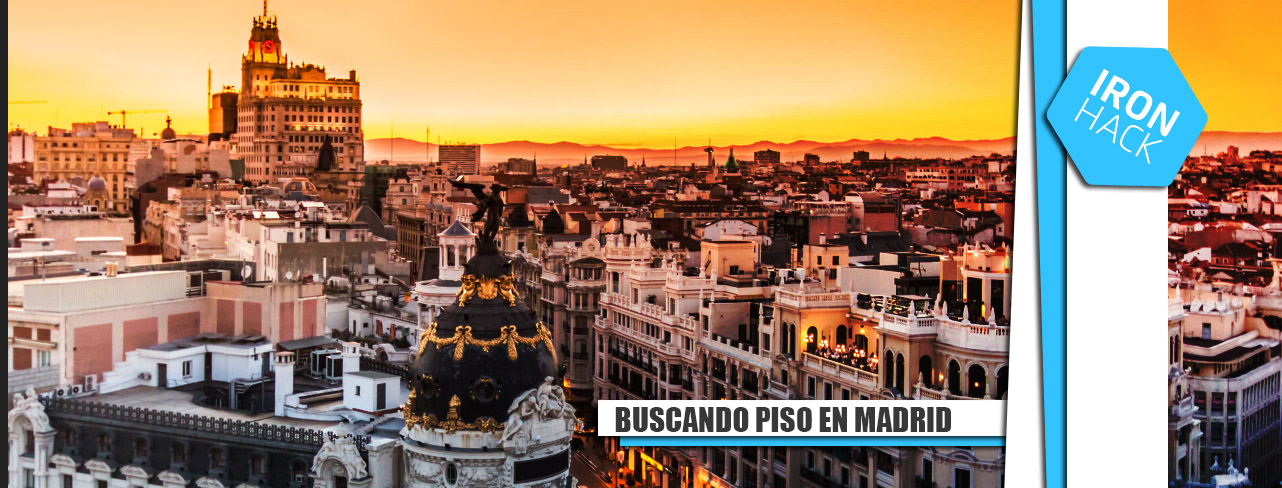

In [1]:
import sys
sys.path.append("../")

In [2]:
import src.tratamiento_datos as td

In [3]:
from pymongo import MongoClient
client = MongoClient("localhost:27017")
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [4]:
db = client.get_database("ironhack")

In [5]:
from pymongo import GEOSPHERE

In [6]:
import numpy as np
import requests
import json
from dotenv import load_dotenv
import os
import pandas as pd
from pandas.core.common import flatten
from functools import reduce
import operator
load_dotenv()

True

### Vamos a empezar a delimitar nuestro círculo para acomodar nuestra sede

#### Para ello he creado un sistema que, basándonos en un primera coordenada (la primera petición que es la empresa tecnologica), haga una query de la segunda petición, almacenaremos los datos obtenidos, los meteremos en un histórico y haremos la media de las latitudes y longitudes entre el punto de partida y los puntos de coincidencia, para usar las medias como puntos de partida para la query del siguiente requisito y así de manera recursiva.

#### En este caso la empresa elegida ha sido eRepublik, ya que cuenta con todos los requisitos necesarios, ha ganado 2.7M es una empresa de videojuegos y tienen un area de diseño. Sus oficinas en Madrid están en estas coordenadas 40.43459348031462, -3.6937967777455025

In [7]:
historico = [[40.43459348031462, -3.6937967777455025]]

In [8]:
lista_resultados = []

In [9]:
medias_historico = []

Primer requisito importante, los bares, vamos a ver cuantos bares nos encontramos alrededor de eRepublik

intentemos automatizar las petitiones y guardar los resultados

In [10]:
lista_resultados = td.hacer_consulta('bares_madrid', historico, 300)

In [11]:
historico = td.guardar_historico(historico, lista_resultados)

In [12]:
medias_historico = td.sacar_media_historico(historico)

In [13]:
lista_resultados = td.hacer_consulta('escuelas_madrid', medias_historico, 100)

In [14]:
historico = td.guardar_historico(historico, lista_resultados)

No ha habido coincidencias en el elem
No ha habido coincidencias en el elem


In [15]:
medias_historico = td.sacar_media_historico(historico)

In [16]:
lista_resultados = td.hacer_consulta('estaciones_madrid', medias_historico, 150)

In [17]:
historico = td.guardar_historico(historico, lista_resultados)

In [18]:
medias_historico = td.sacar_media_historico(historico)

In [19]:
lista_resultados = td.hacer_consulta('starbucks_madrid', medias_historico, 150)

In [20]:
historico = td.guardar_historico(historico, lista_resultados)

In [21]:
medias_historico = td.sacar_media_historico(historico)

In [22]:
lista_resultados = td.hacer_consulta('veterinarios_madrid', medias_historico, 150)

In [23]:
historico = td.guardar_historico(historico, lista_resultados)

In [24]:
medias_historico = td.sacar_media_historico(historico)

In [25]:
coordenadas = pd.DataFrame(historico)

In [26]:
coordenadas['medias'] = medias_historico

In [27]:
nombres_columnas = ['coord_erepublik', 'coord_bar', 'coord_colegio', 'coord_estacion', 'coord_starbucks', 'coord_veterinario', 'posibles_emplazamientos']

In [28]:
coordenadas.columns = nombres_columnas

In [29]:
coordenadas

coord_erepublik                       coord_bar  \
0  [40.43459348031462, -3.6937967777455025]  [40.4337772021, -3.6921263701]   
1  [40.43459348031462, -3.6937967777455025]  [40.4337772021, -3.6921263701]   
2  [40.43459348031462, -3.6937967777455025]  [40.4337772021, -3.6921263701]   
3  [40.43459348031462, -3.6937967777455025]  [40.4337772021, -3.6921263701]   
4  [40.43459348031462, -3.6937967777455025]  [40.4337772021, -3.6921263701]   

                    coord_colegio                  coord_estacion  \
0  [40.4337772021, -3.6921263701]  [40.4337772021, -3.6921263701]   
1  [40.4337772021, -3.6921263701]  [40.4337772021, -3.6921263701]   
2  [40.4337772021, -3.6921263701]  [40.4337772021, -3.6921263701]   
3  [40.4337772021, -3.6921263701]  [40.4337772021, -3.6921263701]   
4  [40.4337772021, -3.6921263701]  [40.4337772021, -3.6921263701]   

                  coord_starbucks               coord_veterinario  \
0  [40.4337772021, -3.6921263701]  [40.4337772021, -3.6921263701]   
1  [40.4337772021, -3.6921263701]  [40.4338185224, -3.6912699659]   
2  [40.4338185224, -3.6912699659]  [40.4337772021, -3.6921263701]   
3  [40.4338185224, -3.6912699659]  [40.4338185224, -3.6912699659]   
4  [40.4338185224, -3.6912699659]  [40.4351629991, -3.6917808228]   

                     posibles_emplazamientos  
0      [40.4339132484691, -3.69240477137425]  
1   [40.43392013518577, -3.6922620373409174]  
2   [40.43392013518577, -3.6922620373409174]  
3    [40.43392702190244, -3.692119303307584]  
4  [40.434151101352434, -3.6922044461242507]